# House Sales in King County, USA

## Here is a brief description of the database

**Source**: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

This database contains prices for homes sold in King County, USA.
This dataset contains house sale prices for King County, which includes Seattle. is a sample of on-site sales between May 2014 and May 2015

* **id**: ID for the house

* **date**: Date the house was sold

* **price**: Price at which the house was sold

* **bedrooms**: Number of bedrooms the house has

* **bathrooms**: Number of bathrooms the house has

* **sqft_living**: Area within the property-measured in square feet

* **sqft_lot**: Lot area - measured in square feet

* **floors**: Number of floors

* **waterfront**: Indicates whether or not the property has a sea view

* **view**: Index from 0 to 4 that rates how good the view of the property was

* **condition**: Contains an index from 1 to 5 on the condition of the property

* **grade**: Contains an index of 1 to 13: a) 1-3->the property has a low level of construction and design; b) 7->has a medium level of construction and design; c) 11-13->has a high level of construction and design quality.

* **sqft_above**: Reports the area of the interior living space that is above ground level

* **sqft_basement**: Contains the basement area

* **yr_built**: Contains the construction date of the property

* **yr_renovated**: Contains the date of the last renovation carried out on the property

* **zipcode**: Contains zipcode

* **lat**: Latitude

* **long**: Longitude

* **sqft_living15**: Contains the average area within the properties of the 15 nearest neighbors-measured in square feet

* **sqft_lot15**: Contains the average area of the 15 nearest neighbors' lots-measured in square feet

In [1]:
%config IPCompleter.greedy=True

In [2]:
#Version python language
from platform import python_version
print('Current Version:', python_version())

Current Version: 3.9.7


In [3]:
!pip install -q -U watermark

In [4]:
!pip install -q ipython-sql

In [5]:
#To creatin messing value map
!pip install -q missingno

In [6]:
#Allows application of categorization to variables
!pip install -q category_encoders

In [7]:
#High-end graphics creation
!pip install -q plotly

In [8]:
#Statistic package
!pip install -q researchpy

In [51]:
#Imports

#Data manipulation
import pandas as pd
import numpy as np

#For using sqlite database
#import sqlite3 as sql3

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

#Statistic
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency
import researchpy as rp
    
#Attribute engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

#Ignore Warning; commands to ignore the warnings that come with packages
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [52]:
#Versions of packages used in this jupyter notebook
%reload_ext watermark
%watermark -a "Alexandre Palma Gonçalves" --iversions

Author: Alexandre Palma Gonçalves

category_encoders: 2.4.0
numpy            : 1.20.3
scipy            : 1.7.1
missingno        : 0.5.1
researchpy       : 0.3.2
seaborn          : 0.11.2
plotly           : 5.6.0
pandas           : 1.3.4
matplotlib       : 3.4.3
sys              : 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]



In [53]:
#Load the dataset
df=pd.read_csv('kc_house_data.csv')

## Preliminary Data Analysis

In [54]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [55]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [56]:
#Info
#other option: df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [57]:
#Number of observationsper variable
df.count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [58]:
#Checking for duplicate ids
df['id'].nunique('id')

21436

In [59]:
#Number of repeated ids
(df['id'].count()) - (df['id'].nunique('id'))

177

In [60]:
#List of repeated ids
df['id'].value_counts()

795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: id, Length: 21436, dtype: int64

In [61]:
#Creating variable that contains the year the house was sold
df['year']=df['date'].str[:4]
df['year']=df['year'].astype('int64')

In [62]:
#Creating a categorical variable based on the age of the property
df['age_yr']=df['year']-df['yr_built']

df['property_age_classification']=np.where(df['age_yr']>=30, 'Old',
               np.where((df['age_yr']>=10) & (df['age_yr']<30), 'Intermediate Age',
               np.where(df['age_yr']<10, 'New','')))

df['property_age_classification']=pd.Categorical(df['property_age_classification'], categories=["Old", "Intermediate Age", "New"], ordered=True)

In [63]:
#Creation of a category for the notes assigned to the architecture of the property
df['architecture']=np.where(df['grade']<=5, 'Low Grade',
               np.where((df['grade']>5) & (df['grade']<=10), 'Average Grade',
               np.where(df['grade']>10, 'High Grade','')))


df['architecture']=pd.Categorical(df['architecture'], categories=['Low Grade', 'Average Grade', 'High Grade'], ordered=True)

In [90]:
#New variables created
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,age_yr,property_age_classification,architecture
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,2014,59,Old,Average Grade
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,2014,63,Old,Average Grade
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,2015,82,Old,Average Grade
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,2014,49,Old,Average Grade
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,2015,28,Intermediate Age,Average Grade


## Descriptive Analysis of Qualitative Variables

In [87]:
#Describing non-numeric data
df.describe(include = object)

,date
count,21613
unique,372
top,20140623T000000
freq,142


In [64]:
#Frequency table for the architecture variable
pd.crosstab(index=df['architecture'], columns="frequency_architecture")

col_0,frequency_architecture
architecture,
Low Grade,275
Average Grade,20836
High Grade,502


In [65]:
#Relative frequency table for the architecture variable
pd.crosstab(index=df['architecture'], columns="relative_frequency_architecture", normalize=True)

col_0,relative_frequency_architecture
architecture,
Low Grade,0.012724
Average Grade,0.964049
High Grade,0.023227


In [66]:
#Frequency table for the property_age_classification variable
pd.crosstab(index=df['property_age_classification'],columns="frequency_property_age_classification")

col_0,frequency_property_age_classification
property_age_classification,
Old,13387
Intermediate Age,5198
New,3028


In [67]:
#Relative frequency table for the property_age_classification variable
pd.crosstab(index=df['property_age_classification'], columns="relative_property_age_classification", normalize=True)

col_0,relative_property_age_classification
property_age_classification,
Old,0.619396
Intermediate Age,0.240503
New,0.140101


[Text(0, 0.5, 'Quantity')]

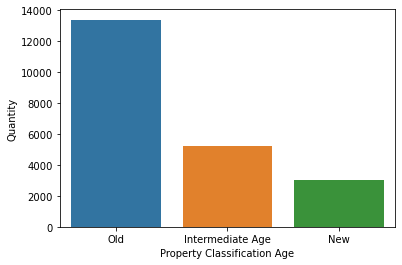

In [73]:
#Plot- property_age_classification variable
plot = sns.countplot(x='property_age_classification', data=df)
plot.set(xlabel="Property Classification Age")
plot.set(Ylabel="Quantity")

col_0                        relative_frequency property_age_classification_2
property_age_classification                                                  
Old                                    0.619396                           Old
Intermediate Age                       0.240503              Intermediate Age
New                                    0.140101                           New


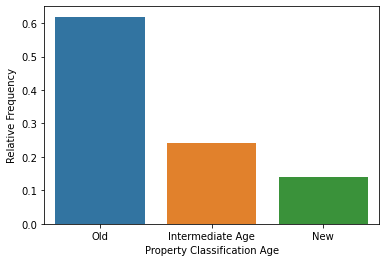

In [80]:
#Plot- relative frequency of property_age_classification variable

df_age=pd.crosstab(index=df['property_age_classification'], columns="relative_frequency", normalize=True)
df_age["property_age_classification_2"]=df_age.index #Creating the property_age_classification_2 column

print(df_age)

plot=sns.barplot(x='property_age_classification_2',y='relative_frequency',data=df_age)
plot.set(xlabel="Property Classification Age")
plot.set(ylabel="Relative Frequency")
plt.show()

## Descriptive Analysis of Quantitative Variables

In [91]:
#Describing the numeric data
df.describe().drop(columns=['id','zipcode','lat','long','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated'])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_living15,sqft_lot15,year,age_yr
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,1986.552492,12768.455652,2014.322954,43.317818
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,685.391304,27304.179631,0.467616,29.375493
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,399.000000,651.000000,2014.000000,-1.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,1490.000000,5100.000000,2014.000000,18.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1840.000000,7620.000000,2014.000000,40.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,2360.000000,10083.000000,2015.000000,63.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,6210.000000,871200.000000,2015.000000,115.000000


col_0     bedrooms_relative_frequency  bedrooms_2
bedrooms                                         
0                            0.000601           0
1                            0.009207           1
2                            0.127701           2
3                            0.454541           3
4                            0.318419           4
5                            0.074076           5
6                            0.012585           6
7                            0.001758           7
8                            0.000601           8
9                            0.000278           9
10                           0.000139          10
11                           0.000046          11
33                           0.000046          33


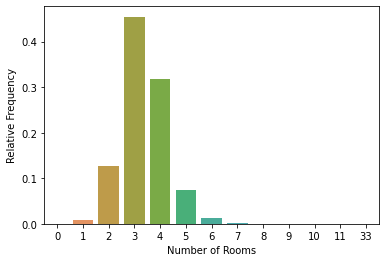

In [98]:
#Plot- relative frequency of bedrooms variable
df_bedrooms=pd.crosstab(index=df['bedrooms'], columns="bedrooms_relative_frequency", normalize=True)
df_bedrooms['bedrooms_2']=df_bedrooms.index

print(df_bedrooms)

#--------------------------
#Plot

plot=sns.barplot(x='bedrooms_2',y='bedrooms_relative_frequency',data=df_bedrooms)
plt.xlabel('Number of Rooms')
plt.ylabel('Relative Frequency')
plt.show()
